In [ ]:
from sympy import *
import numpy as np
init_printing(use_latex=True)

from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

In [ ]:
Ya, Yb, Yc, Y, Xa, Xb, Xc = symbols('Y_A Y_B Y_C Y X_A X_B X_C')
a, w, d, n, k, m, p, q = symbols('alpha omega delta n k mu p q')

# System

In [ ]:
System = Matrix([Ya*(n*k*d*a*Xa-m), Yb*(k*d*a*Xb-m), Y*(n*d*a*Xa+d*a*Xb-m), Xa*(p*w-k*a*Ya-a*Y), Xb*(w-k*a*Yb-a*Y)])#.subs(k,2)
Vars = Matrix([Ya,Yb,Y,Xa,Xb])
J = System.jacobian(Vars)
System, J

⎛⎡   Y_A⋅(X_A⋅α⋅δ⋅k⋅n - μ)   ⎤  ⎡X_A⋅α⋅δ⋅k⋅n - μ        0                   0 
⎜⎢                           ⎥  ⎢                                             
⎜⎢    Y_B⋅(X_B⋅α⋅δ⋅k - μ)    ⎥  ⎢       0         X_B⋅α⋅δ⋅k - μ             0 
⎜⎢                           ⎥  ⎢                                             
⎜⎢Y⋅(X_A⋅α⋅δ⋅n + X_B⋅α⋅δ - μ)⎥, ⎢       0               0        X_A⋅α⋅δ⋅n + X
⎜⎢                           ⎥  ⎢                                             
⎜⎢X_A⋅(-Y⋅α - Y_A⋅α⋅k + ω⋅p) ⎥  ⎢   -X_A⋅α⋅k            0                -X_A⋅
⎜⎢                           ⎥  ⎢                                             
⎝⎣ X_B⋅(-Y⋅α - Y_B⋅α⋅k + ω)  ⎦  ⎣       0           -X_B⋅α⋅k             -X_B⋅

                Y_A⋅α⋅δ⋅k⋅n               0         ⎤⎞
                                                    ⎥⎟
                     0                Y_B⋅α⋅δ⋅k     ⎥⎟
                                                    ⎥⎟
_B⋅α⋅δ - μ        Y⋅α⋅δ⋅n               Y⋅α⋅δ       ⎥⎟
             

# Fixed Points

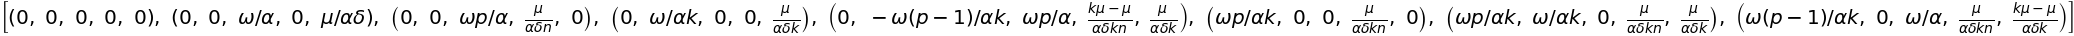

In [ ]:
sol = solve(System, Vars)
sol

# Point 1: Only Y, without Xa

In [ ]:
sol1 = J.subs(list(zip(Vars,sol[1])))
sol[1], sol1, sol1.eigenvals()

⎛                   ⎡-μ     0      0      0      0 ⎤                          
⎜                   ⎢                              ⎥                          
⎜                   ⎢0   k⋅μ - μ   0      0      0 ⎥                          
⎜                   ⎢                              ⎥                          
⎜⎛      ω      μ ⎞  ⎢0      0      0    δ⋅n⋅ω   δ⋅ω⎥  ⎧          ______       
⎜⎜0, 0, ─, 0, ───⎟, ⎢                              ⎥, ⎨-μ: 1, -╲╱ -μ⋅ω : 1, ╲╱
⎜⎝      α     α⋅δ⎠  ⎢0      0      0   ω⋅p - ω   0 ⎥  ⎩                       
⎜                   ⎢                              ⎥                          
⎜                   ⎢     -k⋅μ    -μ               ⎥                          
⎜                   ⎢0    ─────   ───     0      0 ⎥                          
⎝                   ⎣       δ      δ               ⎦                          

                                  ⎞
                                  ⎟
                                  ⎟
                      

In [ ]:
sol1.eigenvects()

⎡                                                                             
⎢                ⎛              ⎡⎡             0              ⎤⎤⎞  ⎛          
⎢                ⎜              ⎢⎢                            ⎥⎥⎟  ⎜          
⎢⎛       ⎡⎡1⎤⎤⎞  ⎜              ⎢⎢             0              ⎥⎥⎟  ⎜          
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢                            ⎥⎥⎟  ⎜          
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜              ⎢⎢ ⎛                  ______⎞ ⎥⎥⎟  ⎜          
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜   ______     ⎢⎢-⎝δ⋅ω⋅p - δ⋅ω + δ⋅╲╱ -μ⋅ω ⎠ ⎥⎥⎟  ⎜  ______  
⎢⎜-μ, 1, ⎢⎢0⎥⎥⎟, ⎜-╲╱ -μ⋅ω , 1, ⎢⎢────────────────────────────⎥⎥⎟, ⎜╲╱ -μ⋅ω , 
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢          ______     ______ ⎥⎥⎟  ⎜          
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜              ⎢⎢ -μ + p⋅╲╱ -μ⋅ω  - ╲╱ -μ⋅ω  ⎥⎥⎟  ⎜          
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢                            ⎥⎥⎟  ⎜          
⎢⎝       ⎣⎣0⎦⎦⎠  ⎜              ⎢⎢             0              ⎥⎥⎟  ⎜          
⎢                ⎜              ⎢⎢                  

In [ ]:
sol1.det(), sol1.trace(), sol1.trace()**2 - 4*sol1.det()

# Point 2: Only Y, without Xb

In [ ]:
sol2 = J.subs(list(zip(Vars,sol[2])))
sol[2], sol2, sol2.eigenvals()

⎛                       ⎡k⋅μ - μ  0    0      0        0    ⎤                 
⎜                       ⎢                                   ⎥                 
⎜                       ⎢   0     -μ   0      0        0    ⎥                 
⎜                       ⎢                                   ⎥                 
⎜⎛      ω⋅p    μ     ⎞  ⎢   0     0    0   δ⋅n⋅ω⋅p   δ⋅ω⋅p  ⎥  ⎧          ____
⎜⎜0, 0, ───, ─────, 0⎟, ⎢                                   ⎥, ⎨-μ: 1, -╲╱ -μ⋅
⎜⎝       α   α⋅δ⋅n   ⎠  ⎢ -k⋅μ        -μ                    ⎥  ⎩              
⎜                       ⎢ ─────   0   ───     0        0    ⎥                 
⎜                       ⎢  δ⋅n        δ⋅n                   ⎥                 
⎜                       ⎢                                   ⎥                 
⎝                       ⎣   0     0    0      0     -ω⋅p + ω⎦                 

                                                ⎞
                                                ⎟
                              

In [ ]:
sol2.eigenvects()

⎡                                                                             
⎢                                                                             
⎢                ⎛                ⎡⎡                        0                 
⎢                ⎜                ⎢⎢                                          
⎢⎛       ⎡⎡0⎤⎤⎞  ⎜                ⎢⎢                        0                 
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜                ⎢⎢                                          
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜                ⎢⎢ ⎛                                     ___
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜   ________     ⎢⎢-⎝-δ⋅k⋅μ⋅n⋅ω⋅p + δ⋅μ⋅n⋅ω⋅p - δ⋅n⋅ω⋅p⋅╲╱ -μ
⎢⎜-μ, 1, ⎢⎢0⎥⎥⎟, ⎜-╲╱ -μ⋅ω⋅p , 1, ⎢⎢──────────────────────────────────────────
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜                ⎢⎢             ________               ______
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜                ⎢⎢     - k⋅μ⋅╲╱ -μ⋅ω⋅p  + μ⋅ω⋅p + μ⋅╲╱ -μ⋅ω⋅
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜                ⎢⎢                                          
⎢⎝       ⎣⎣0⎦⎦⎠  ⎜                ⎢⎢                

In [ ]:
sol2.det(), sol2.trace(), sol2.trace()**2 - 4*sol2.det()

# Point 3: Yb-Xb Lotka Volterra

In [ ]:
sol3 = J.subs(list(zip(Vars,sol[3])))
sol[3], sol3, sol3.eigenvals()

⎛                       ⎡-μ   0     0      0    0 ⎤                           
⎜                       ⎢                         ⎥                           
⎜                       ⎢0    0     0      0   δ⋅ω⎥                           
⎜                       ⎢                         ⎥                           
⎜                       ⎢              μ          ⎥                           
⎜⎛    ω           μ  ⎞  ⎢0    0   -μ + ─   0    0 ⎥  ⎧       -k⋅μ + μ         
⎜⎜0, ───, 0, 0, ─────⎟, ⎢              k          ⎥, ⎨-μ: 1, ────────: 1, ω⋅p:
⎜⎝   α⋅k        α⋅δ⋅k⎠  ⎢                         ⎥  ⎩          k             
⎜                       ⎢0    0     0     ω⋅p   0 ⎥                           
⎜                       ⎢                         ⎥                           
⎜                       ⎢    -μ    -μ             ⎥                           
⎜                       ⎢0   ───   ───     0    0 ⎥                           
⎝                       ⎣     δ    δ⋅k            ⎦ 

In [ ]:
sol3.eigenvects()

⎡                ⎛             ⎡⎡                  0                  ⎤⎤⎞     
⎢                ⎜             ⎢⎢                                     ⎥⎥⎟     
⎢                ⎜             ⎢⎢               -δ⋅k⋅ω                ⎥⎥⎟     
⎢⎛       ⎡⎡1⎤⎤⎞  ⎜             ⎢⎢               ───────               ⎥⎥⎟  ⎛  
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢               k⋅μ - μ               ⎥⎥⎟  ⎜  
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢                                     ⎥⎥⎟  ⎜  
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜-k⋅μ + μ     ⎢⎢ ⎛     2        2                  ⎞ ⎥⎥⎟  ⎜  
⎢⎜-μ, 1, ⎢⎢0⎥⎥⎟, ⎜────────, 1, ⎢⎢-⎝- δ⋅k ⋅μ - δ⋅k ⋅ω + 2⋅δ⋅k⋅μ - δ⋅μ⎠ ⎥⎥⎟, ⎜ω⋅
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜   k         ⎢⎢─────────────────────────────────────⎥⎥⎟  ⎜  
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢               k⋅μ - μ               ⎥⎥⎟  ⎜  
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢                                     ⎥⎥⎟  ⎜  
⎢⎝       ⎣⎣0⎦⎦⎠  ⎜             ⎢⎢                  0                  ⎥⎥⎟  ⎝  
⎢                ⎜             ⎢⎢                   

In [ ]:
sol3.det(), sol3.trace(), sol3.trace()**2 - 4*sol3.det() 

# Point 4: No Ya (only for p<1)

In [ ]:
sol4 = J.subs(list(zip(Vars,sol[4])))
sol[4], sol4, sol4.eigenvals()

⎛                                       ⎡ k⋅μ - 2⋅μ    0          0           
⎜                                       ⎢                                     
⎜                                       ⎢     0        0          0           
⎜                                       ⎢                                     
⎜                                       ⎢                       μ   k⋅μ - μ   
⎜                                       ⎢     0        0   -μ + ─ + ───────  δ
⎜⎛   -ω⋅(p - 1)   ω⋅p  k⋅μ - μ    μ  ⎞  ⎢                       k      k      
⎜⎜0, ───────────, ───, ───────, ─────⎟, ⎢                                     
⎜⎝       α⋅k       α   α⋅δ⋅k⋅n  α⋅δ⋅k⎠  ⎢-(k⋅μ - μ)          -(k⋅μ - μ)       
⎜                                       ⎢───────────   0     ───────────      
⎜                                       ⎢    δ⋅n                δ⋅k⋅n         
⎜                                       ⎢                                     
⎜                                       ⎢           

In [ ]:
sol4.eigenvects()

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢⎛              ⎡⎡ ⎛     5  2        4  2         3  2      3             2  2
⎢⎜              ⎢⎢-⎝- δ⋅k ⋅μ  + 8⋅δ⋅k ⋅μ  - 24⋅δ⋅k ⋅μ  - δ⋅k ⋅μ⋅ω + 32⋅δ⋅k ⋅μ 
⎢⎜              ⎢⎢────────────────────────────────────────────────────────────
⎢⎜              ⎢⎢                                                         2  
⎢⎜              ⎢⎢                                                        k ⋅μ
⎢⎜              ⎢⎢                                                            
⎢⎜              ⎢⎢                                  

In [ ]:
sol4.det(), sol4.trace(), sol4.trace()**2 - 4*sol4.det()

# Point 5: Ya-Xa Lotka Volterra

In [ ]:
sol5 = J.subs(list(zip(Vars,sol[5])))
sol[5], sol5, sol5.eigenvals()

⎛                         ⎡ 0   0     0     δ⋅n⋅ω⋅p  0⎤                       
⎜                         ⎢                           ⎥                       
⎜                         ⎢ 0   -μ    0        0     0⎥                       
⎜                         ⎢                           ⎥                       
⎜                         ⎢              μ            ⎥                       
⎜⎛ω⋅p           μ      ⎞  ⎢ 0   0   -μ + ─     0     0⎥  ⎧             -k⋅μ + 
⎜⎜───, 0, 0, ───────, 0⎟, ⎢              k            ⎥, ⎨-μ: 1, ω: 1, ───────
⎜⎝α⋅k        α⋅δ⋅k⋅n   ⎠  ⎢                           ⎥  ⎩                k   
⎜                         ⎢-μ        -μ               ⎥                       
⎜                         ⎢───  0   ─────      0     0⎥                       
⎜                         ⎢δ⋅n      δ⋅k⋅n             ⎥                       
⎜                         ⎢                           ⎥                       
⎝                         ⎣ 0   0     0        0    

In [ ]:
sol5.eigenvects()

⎡                               ⎛             ⎡⎡                  -δ⋅k⋅n⋅ω⋅p  
⎢                               ⎜             ⎢⎢                  ─────────── 
⎢                               ⎜             ⎢⎢                    k⋅μ - μ   
⎢⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞  ⎜             ⎢⎢                              
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢                       0      
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢                              
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜-k⋅μ + μ     ⎢⎢ ⎛     2          2           
⎢⎜-μ, 1, ⎢⎢0⎥⎥⎟, ⎜ω, 1, ⎢⎢0⎥⎥⎟, ⎜────────, 1, ⎢⎢-⎝- δ⋅k ⋅μ⋅n - δ⋅k ⋅n⋅ω⋅p + 2⋅
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜   k         ⎢⎢──────────────────────────────
⎢⎜       ⎢⎢0⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢                    k⋅μ - μ   
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢                              
⎢⎝       ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎜             ⎢⎢                       1      
⎢                               ⎜             ⎢⎢    

In [ ]:
sol5.det(), sol5.trace(), sol5.trace()**2 - 4*sol5.det()

# Point 6: No Y, uncoupled Ya-Xa Yb-Xb Lotka Volterra

In [ ]:
sol6 = J.subs(list(zip(Vars,sol[6])))
sol[6], sol6, sol6.eigenvals()

⎛                               ⎡ 0    0      0      δ⋅n⋅ω⋅p   0 ⎤            
⎜                               ⎢                                ⎥            
⎜                               ⎢ 0    0      0         0     δ⋅ω⎥            
⎜                               ⎢                                ⎥            
⎜                               ⎢               2⋅μ              ⎥            
⎜                               ⎢ 0    0   -μ + ───     0      0 ⎥            
⎜⎛ω⋅p   ω         μ       μ  ⎞  ⎢                k               ⎥  ⎧-k⋅μ + 2⋅
⎜⎜───, ───, 0, ───────, ─────⎟, ⎢                                ⎥, ⎨─────────
⎜⎝α⋅k  α⋅k     α⋅δ⋅k⋅n  α⋅δ⋅k⎠  ⎢-μ          -μ                  ⎥  ⎩    k    
⎜                               ⎢───   0    ─────       0      0 ⎥            
⎜                               ⎢δ⋅n        δ⋅k⋅n                ⎥            
⎜                               ⎢                                ⎥            
⎜                               ⎢     -μ     -μ     

In [ ]:
sol6.eigenvects()

⎡⎛               ⎡⎡ ⎛   3            3  2          2                    ⎞  ⎤⎤⎞
⎢⎜               ⎢⎢-⎝δ⋅k ⋅μ⋅ω⋅p + δ⋅k ⋅ω ⋅p - 4⋅δ⋅k ⋅μ⋅ω⋅p + 4⋅δ⋅k⋅μ⋅ω⋅p⎠  ⎥⎥⎟
⎢⎜               ⎢⎢────────────────────────────────────────────────────────⎥⎥⎟
⎢⎜               ⎢⎢ 3  2    3            2  2      2               2      2⎥⎥⎟
⎢⎜               ⎢⎢k ⋅μ  + k ⋅μ⋅ω⋅p - 6⋅k ⋅μ  - 2⋅k ⋅μ⋅ω⋅p + 12⋅k⋅μ  - 8⋅μ ⎥⎥⎟
⎢⎜               ⎢⎢                                                        ⎥⎥⎟
⎢⎜               ⎢⎢                        -δ⋅k⋅ω                          ⎥⎥⎟
⎢⎜               ⎢⎢                       ─────────                        ⎥⎥⎟
⎢⎜               ⎢⎢                       k⋅μ - 2⋅μ                        ⎥⎥⎟
⎢⎜               ⎢⎢                                                        ⎥⎥⎟
⎢⎜-k⋅μ + 2⋅μ     ⎢⎢         ⎛     2        2                    ⎞          ⎥⎥⎟
⎢⎜──────────, 1, ⎢⎢        -⎝- δ⋅k ⋅μ - δ⋅k ⋅ω + 4⋅δ⋅k⋅μ - 4⋅δ⋅μ⎠          ⎥⎥⎟
⎢⎜    k          ⎢⎢        ─────────────────────────

In [ ]:
sol6.det(), sol6.trace(), sol6.trace()**2 - 4*sol6.det()

# Point 7: No Yb (only for p>1)

---



In [ ]:
sol7 = J.subs(list(zip(Vars,sol[7])))
sol[7], sol7, sol7.eigenvals()

⎛                                     ⎡ 0        0              0             
⎜                                     ⎢                                       
⎜                                     ⎢ 0    k⋅μ - 2⋅μ          0             
⎜                                     ⎢                                       
⎜                                     ⎢                       μ   k⋅μ - μ     
⎜                                     ⎢ 0        0       -μ + ─ + ───────     
⎜⎛ω⋅(p - 1)     ω     μ     k⋅μ - μ⎞  ⎢                       k      k        
⎜⎜─────────, 0, ─, ───────, ───────⎟, ⎢                                       
⎜⎝   α⋅k        α  α⋅δ⋅k⋅n   α⋅δ⋅k ⎠  ⎢-μ                      -μ             
⎜                                     ⎢───       0            ─────        ω⋅p
⎜                                     ⎢δ⋅n                    δ⋅k⋅n           
⎜                                     ⎢                                       
⎜                                     ⎢     -(k⋅μ - 

In [ ]:
sol7.eigenvects()

⎡                                                                             
⎢                                                                             
⎢⎛              ⎡⎡                                                            
⎢⎜              ⎢⎢                                                            
⎢⎜              ⎢⎢                           ─────────────────────────────────
⎢⎜              ⎢⎢                            4  2      3  2       2  2    2  
⎢⎜              ⎢⎢                           k ⋅μ  - 6⋅k ⋅μ  + 12⋅k ⋅μ  + k ⋅μ
⎢⎜              ⎢⎢                                                            
⎢⎜              ⎢⎢ ⎛   5  2        4  2         3  2      3               2  2
⎢⎜              ⎢⎢-⎝δ⋅k ⋅μ  - 8⋅δ⋅k ⋅μ  + 24⋅δ⋅k ⋅μ  + δ⋅k ⋅μ⋅ω⋅p - 32⋅δ⋅k ⋅μ 
⎢⎜              ⎢⎢────────────────────────────────────────────────────────────
⎢⎜              ⎢⎢           5  2      4  2       3  2    3          3        
⎢⎜              ⎢⎢          k ⋅μ  - 7⋅k ⋅μ  + 18⋅k ⋅

In [ ]:
sol7.det(), sol7.trace(), sol7.trace()**2 - 4*sol7.det()

# Point 0: Trivial

In [ ]:
sol0 = J.subs(list(zip(Vars,sol[0])))
sol[0], sol0, sol0.eigenvals()

⎛                 ⎡-μ  0   0    0   0⎤                       ⎞
⎜                 ⎢                  ⎥                       ⎟
⎜                 ⎢0   -μ  0    0   0⎥                       ⎟
⎜                 ⎢                  ⎥                       ⎟
⎜(0, 0, 0, 0, 0), ⎢0   0   -μ   0   0⎥, {-μ: 3, ω: 1, ω⋅p: 1}⎟
⎜                 ⎢                  ⎥                       ⎟
⎜                 ⎢0   0   0   ω⋅p  0⎥                       ⎟
⎜                 ⎢                  ⎥                       ⎟
⎝                 ⎣0   0   0    0   ω⎦                       ⎠

In [ ]:
sol0.eigenvects()

⎡⎛       ⎡⎡1⎤  ⎡0⎤  ⎡0⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞  ⎛        ⎡⎡0⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎢⎜       ⎢⎢0⎥  ⎢1⎥  ⎢0⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜        ⎢⎢0⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎢⎜-μ, 3, ⎢⎢0⎥, ⎢0⎥, ⎢1⎥⎥⎟, ⎜ω, 1, ⎢⎢0⎥⎥⎟, ⎜ω⋅p, 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎢⎜       ⎢⎢0⎥  ⎢0⎥  ⎢0⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜        ⎢⎢1⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦  ⎣0⎦  ⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝        ⎣⎣0⎦⎦⎠⎦

In [ ]:
sol0.det(), sol0.trace(), sol0.trace()**2 - 4*sol0.det()

# Model with 3 preys

In [ ]:
System = Matrix([Ya*(n*k*d*a*Xa-m), Yb*(k*d*a*Xb-m), Yc*(k*d*a*Xc-m), Y*(n*d*a*Xa+d*a*Xb+d*a*Xc-m), Xa*(p*w-k*a*Ya-a*Y), Xb*(w-k*a*Yb-a*Y), Xc*(q*w-k*a*Yc-a*Y)])#.subs(k,2)
Vars = Matrix([Ya,Yb,Yc,Y,Xa,Xb,Xc])
J = System.jacobian(Vars)
System, J

⎛⎡        Y_A⋅(X_A⋅α⋅δ⋅k⋅n - μ)        ⎤  ⎡X_A⋅α⋅δ⋅k⋅n - μ        0           
⎜⎢                                     ⎥  ⎢                                   
⎜⎢         Y_B⋅(X_B⋅α⋅δ⋅k - μ)         ⎥  ⎢       0         X_B⋅α⋅δ⋅k - μ     
⎜⎢                                     ⎥  ⎢                                   
⎜⎢         Y_C⋅(X_C⋅α⋅δ⋅k - μ)         ⎥  ⎢       0               0        X_C
⎜⎢                                     ⎥  ⎢                                   
⎜⎢Y⋅(X_A⋅α⋅δ⋅n + X_B⋅α⋅δ + X_C⋅α⋅δ - μ)⎥, ⎢       0               0           
⎜⎢                                     ⎥  ⎢                                   
⎜⎢     X_A⋅(-Y⋅α - Y_A⋅α⋅k + ω⋅p)      ⎥  ⎢   -X_A⋅α⋅k            0           
⎜⎢                                     ⎥  ⎢                                   
⎜⎢      X_B⋅(-Y⋅α - Y_B⋅α⋅k + ω)       ⎥  ⎢       0           -X_B⋅α⋅k        
⎜⎢                                     ⎥  ⎢                                   
⎝⎣     X_C⋅(-Y⋅α - Y_C⋅α⋅k + ω⋅q)      ⎦  ⎣       0 

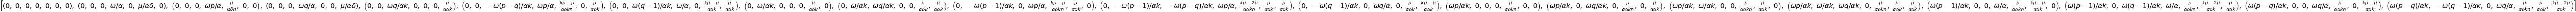

In [ ]:
sol = solve(System, Vars)
sol

# Numerical Analysis

In [ ]:
def DetGameSPE(y0,al,w,mu,de,k,n,p,time):
    
    def System(y,t,al,w,mu,de,k,n,p):
        Ya,Yb,Y,Xa,Xb = y
        
        dYa = Ya*(k*al*n*de*Xa - mu)
        dYb = Yb*(k*al*de*Xb - mu)
        dY = Y*(al*n*de*Xa + al*de*Xb - mu)
        dXa = Xa*(p*w - al*Y - k*al*Ya)
        dXb = Xb*(w - al*Y - k*al*Yb)
        

        dydt = [dYa,dYb,dY,dXa,dXb]
        return dydt
    
    

    T = np.linspace(0,time,100*time+1)
    sol = odeint(System, y0, T, args=(al,w,mu,de,k,n,p,))

    return sol,T

In [ ]:
def DetGameSPE3(y0,al,w,mu,de,k,n,p,q,time):
    
    def System(y,t,al,w,mu,de,k,n,p,q):
        Ya,Yb,Yc,Y,Xa,Xb,Xc = y
        
        dYa = Ya*(k*al*n*de*Xa - mu)
        dYb = Yb*(k*al*de*Xb - mu)
        dYc = Yc*(k*al*de*Xc - mu)
        dY = Y*(al*n*de*Xa + al*de*Xb + al*de*Xc - mu)
        dXa = Xa*(p*w - al*Y - k*al*Ya)
        dXb = Xb*(w - al*Y - k*al*Yb)
        dXc = Xc*(q*w - al*Y - k*al*Yc)
        

        dydt = [dYa,dYb,dYc,dY,dXa,dXb,dXc]
        return dydt
    
    

    T = np.linspace(0,time,100*time+1)
    sol = odeint(System, y0, T, args=(al,w,mu,de,k,n,p,q,))

    return sol,T

In [ ]:
# Parameter Values

al = 0.5
w = 0.2
de = 1
mu = 0.3
k=1.5
n=2.5
p=1.5
q=2

maxtime = 50

In [ ]:
y0 = [0.5,0.3,0.6,0.2,0.4]
#y0 = [0.5,0,0.6,0.2,0]
y03 = [0.5,0.3,0.35,0.6,0.2,0.4,0.25]

Text(0.5, 0, 'Time')

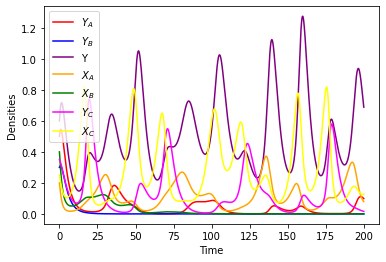

In [ ]:
k = 2
maxtime=200

#sol,solT = DetGameSPE(y0,al,w,mu,de,k,n,p,maxtime)
sol,solT = DetGameSPE3(y03,al,w,mu,de,k,n,p,q,maxtime)

Ya,Yb,Yc,Y,Xa,Xb,Xc = sol.T

plt.plot(solT,Ya, label="$Y_A$", c='red')
plt.plot(solT,Yb, label="$Y_B$", c='blue')
plt.plot(solT,Y, label="Y", c='purple')
plt.plot(solT,Xa, label="$X_A$", c='orange')
plt.plot(solT,Xb, label="$X_B$", c='green')
plt.plot(solT,Yc, label="$Y_C$", c='magenta')
plt.plot(solT,Xc, label="$X_C$", c='yellow')

plt.legend(loc='best')
#plt.title('$k=1.5$')
plt.ylabel('Densities')
plt.xlabel('Time')

#plt.ylim(0.027,0.029)
#plt.xlim(0,5)

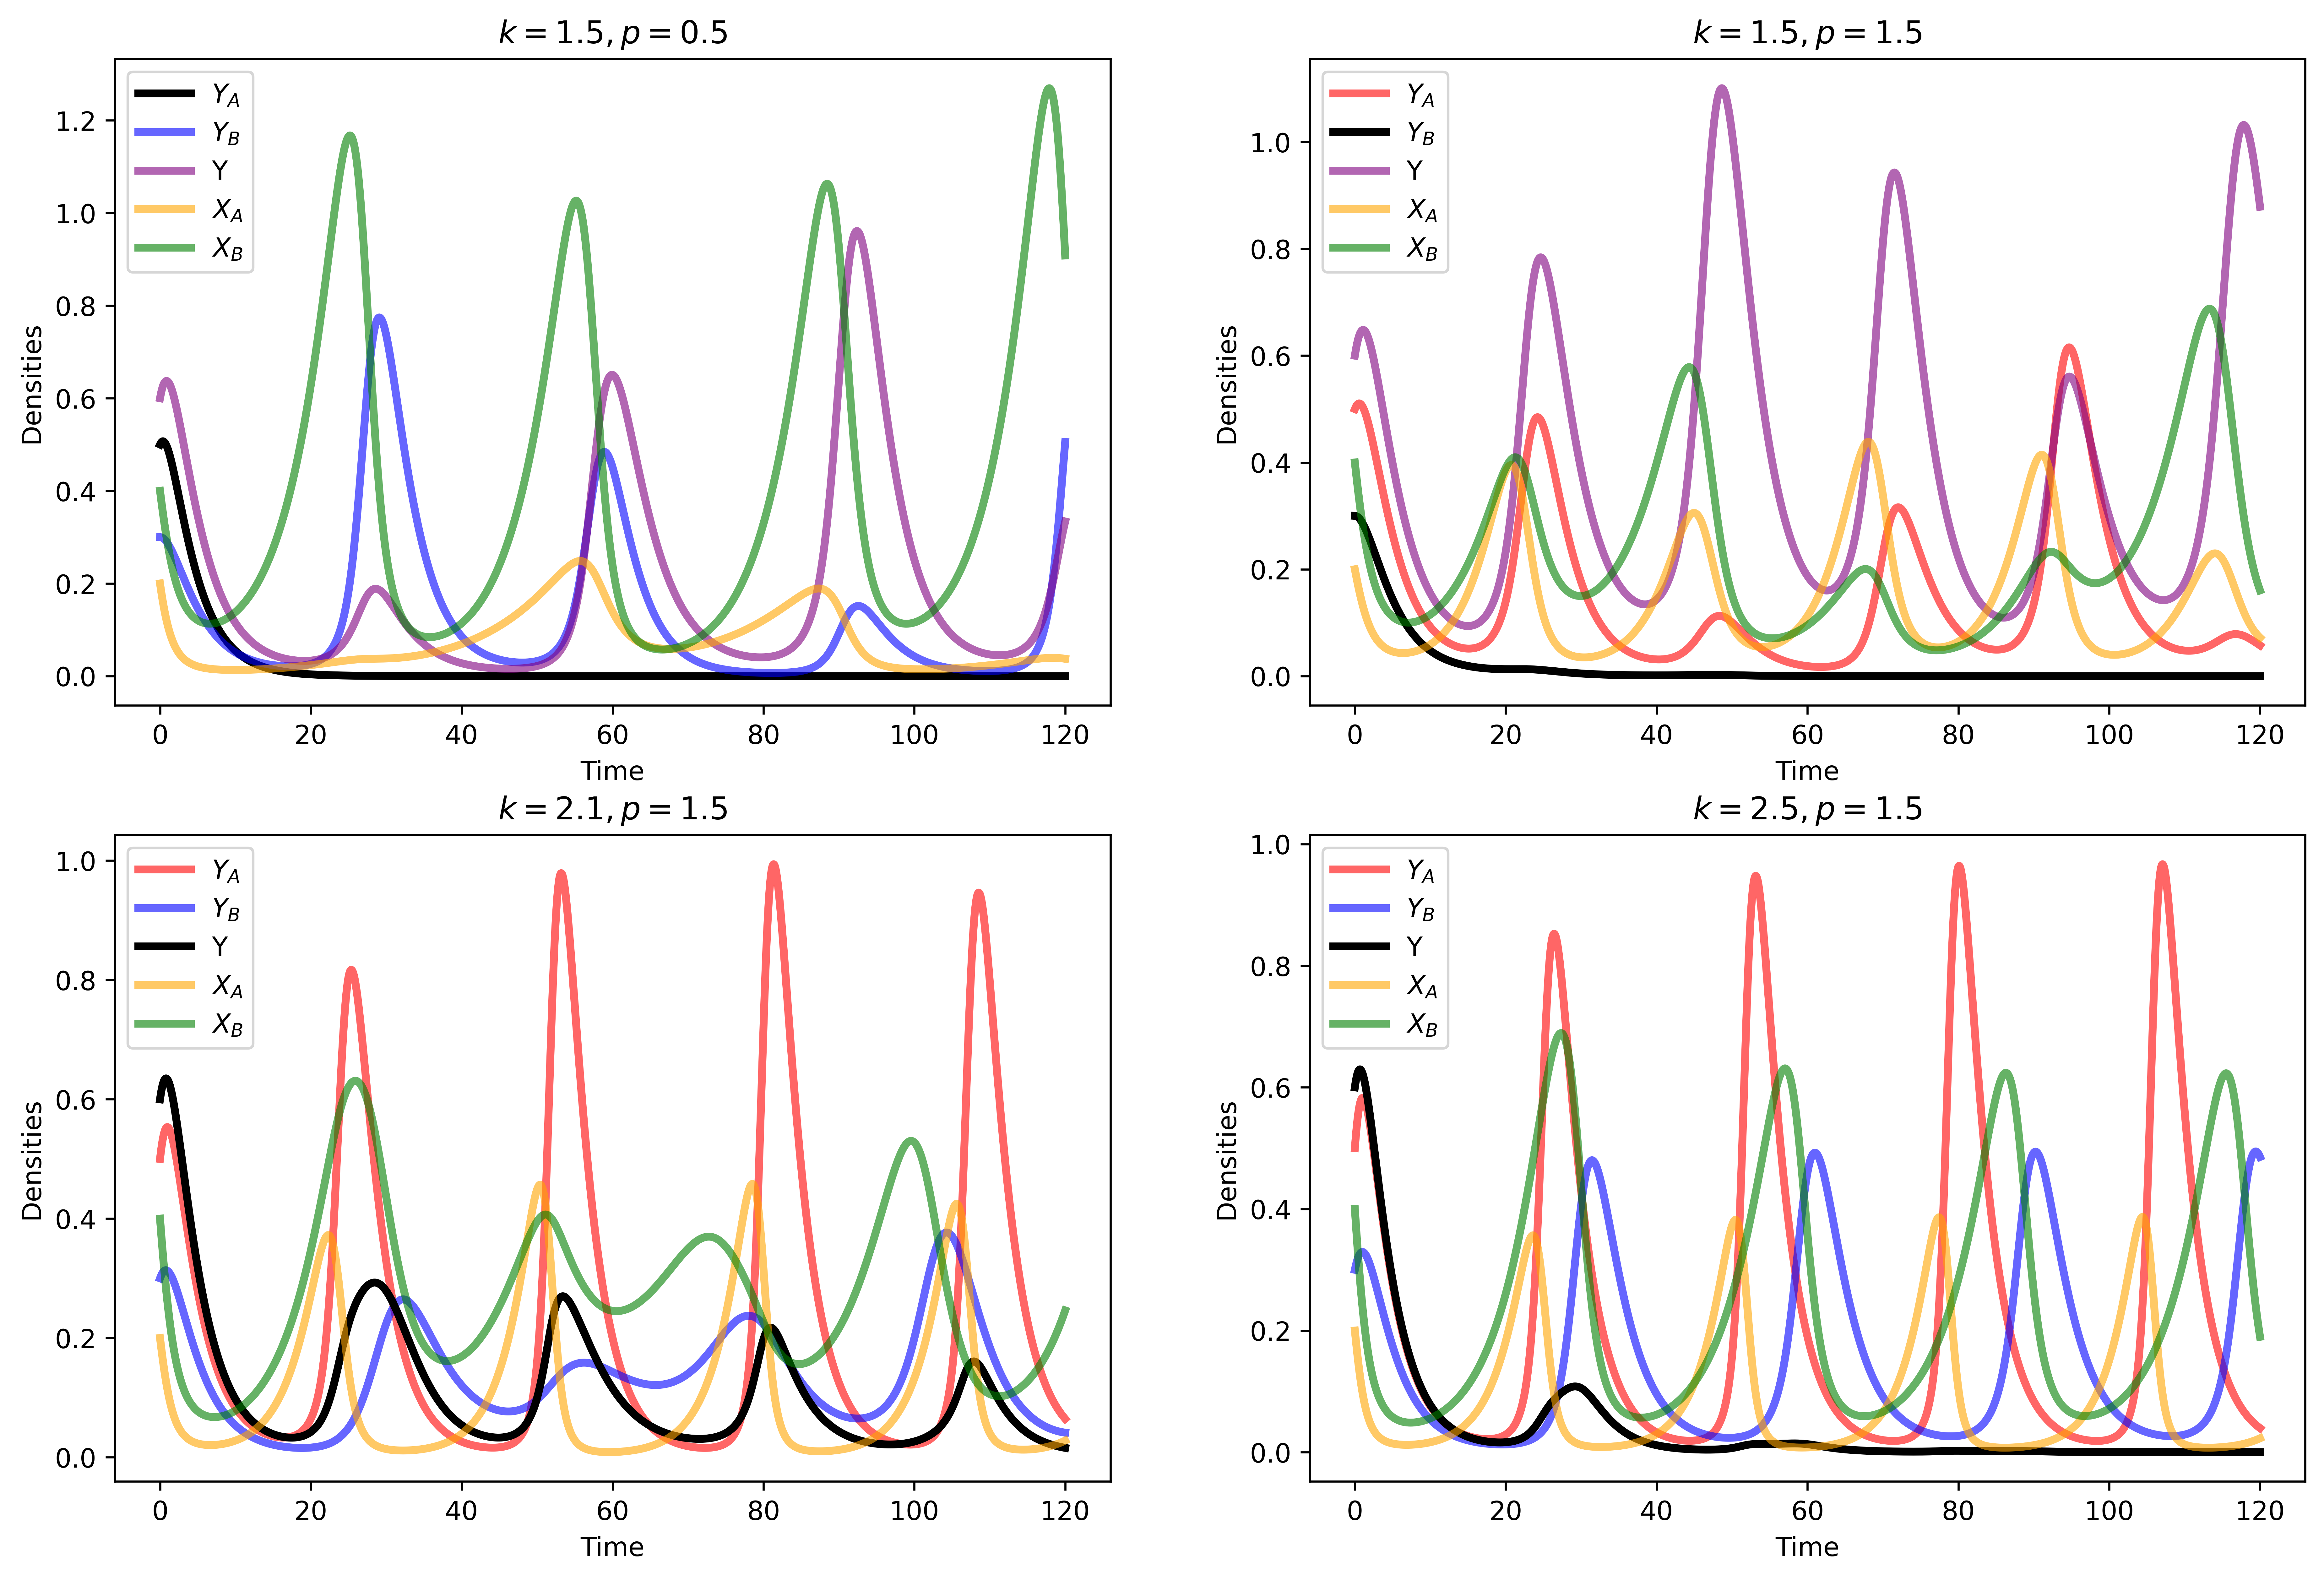

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10), dpi=600)
lwd=3
maxtime=120
trcy = 0.6

k = 1.5
p = 0.5

sol,solT = DetGameSPE(y0,al,w,mu,de,k,n,p,maxtime)

Ya,Yb,Y,Xa,Xb = sol.T

axs[0,0].plot(solT,Ya, label="$Y_A$", c='black', linewidth=lwd, alpha=1)
axs[0,0].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Y, label="Y", c='purple', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[0,0].legend(loc='best')
axs[0,0].set_title('$k=1.5,p=0.5$')
axs[0,0].set_ylabel('Densities')
axs[0,0].set_xlabel('Time')



k = 1.5
p = 1.5


sol,solT = DetGameSPE(y0,al,w,mu,de,k,n,p,maxtime)

Ya,Yb,Y,Xa,Xb = sol.T

axs[0,1].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Yb, label="$Y_B$", c='black', linewidth=lwd, alpha=1)
axs[0,1].plot(solT,Y, label="Y", c='purple', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[0,1].legend(loc='best')
axs[0,1].set_title('$k=1.5,p=1.5$')
axs[0,1].set_ylabel('Densities')
axs[0,1].set_xlabel('Time')



k = 2.1

sol,solT = DetGameSPE(y0,al,w,mu,de,k,n,p,maxtime)

Ya,Yb,Y,Xa,Xb = sol.T

axs[1,0].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Y, label="Y", c='black', linewidth=lwd, alpha=1)
axs[1,0].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[1,0].legend(loc='best')
axs[1,0].set_title('$k=2.1,p=1.5$')
axs[1,0].set_ylabel('Densities')
axs[1,0].set_xlabel('Time')



k = 2.5

sol,solT = DetGameSPE(y0,al,w,mu,de,k,n,p,maxtime)

Ya,Yb,Y,Xa,Xb = sol.T

axs[1,1].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Y, label="Y", c='black', linewidth=lwd, alpha=1)
axs[1,1].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[1,1].legend(loc='best')
axs[1,1].set_title('$k=2.5,p=1.5$')
axs[1,1].set_ylabel('Densities')
axs[1,1].set_xlabel('Time')

#plt.savefig('graphic1',dpi=300,format='png')

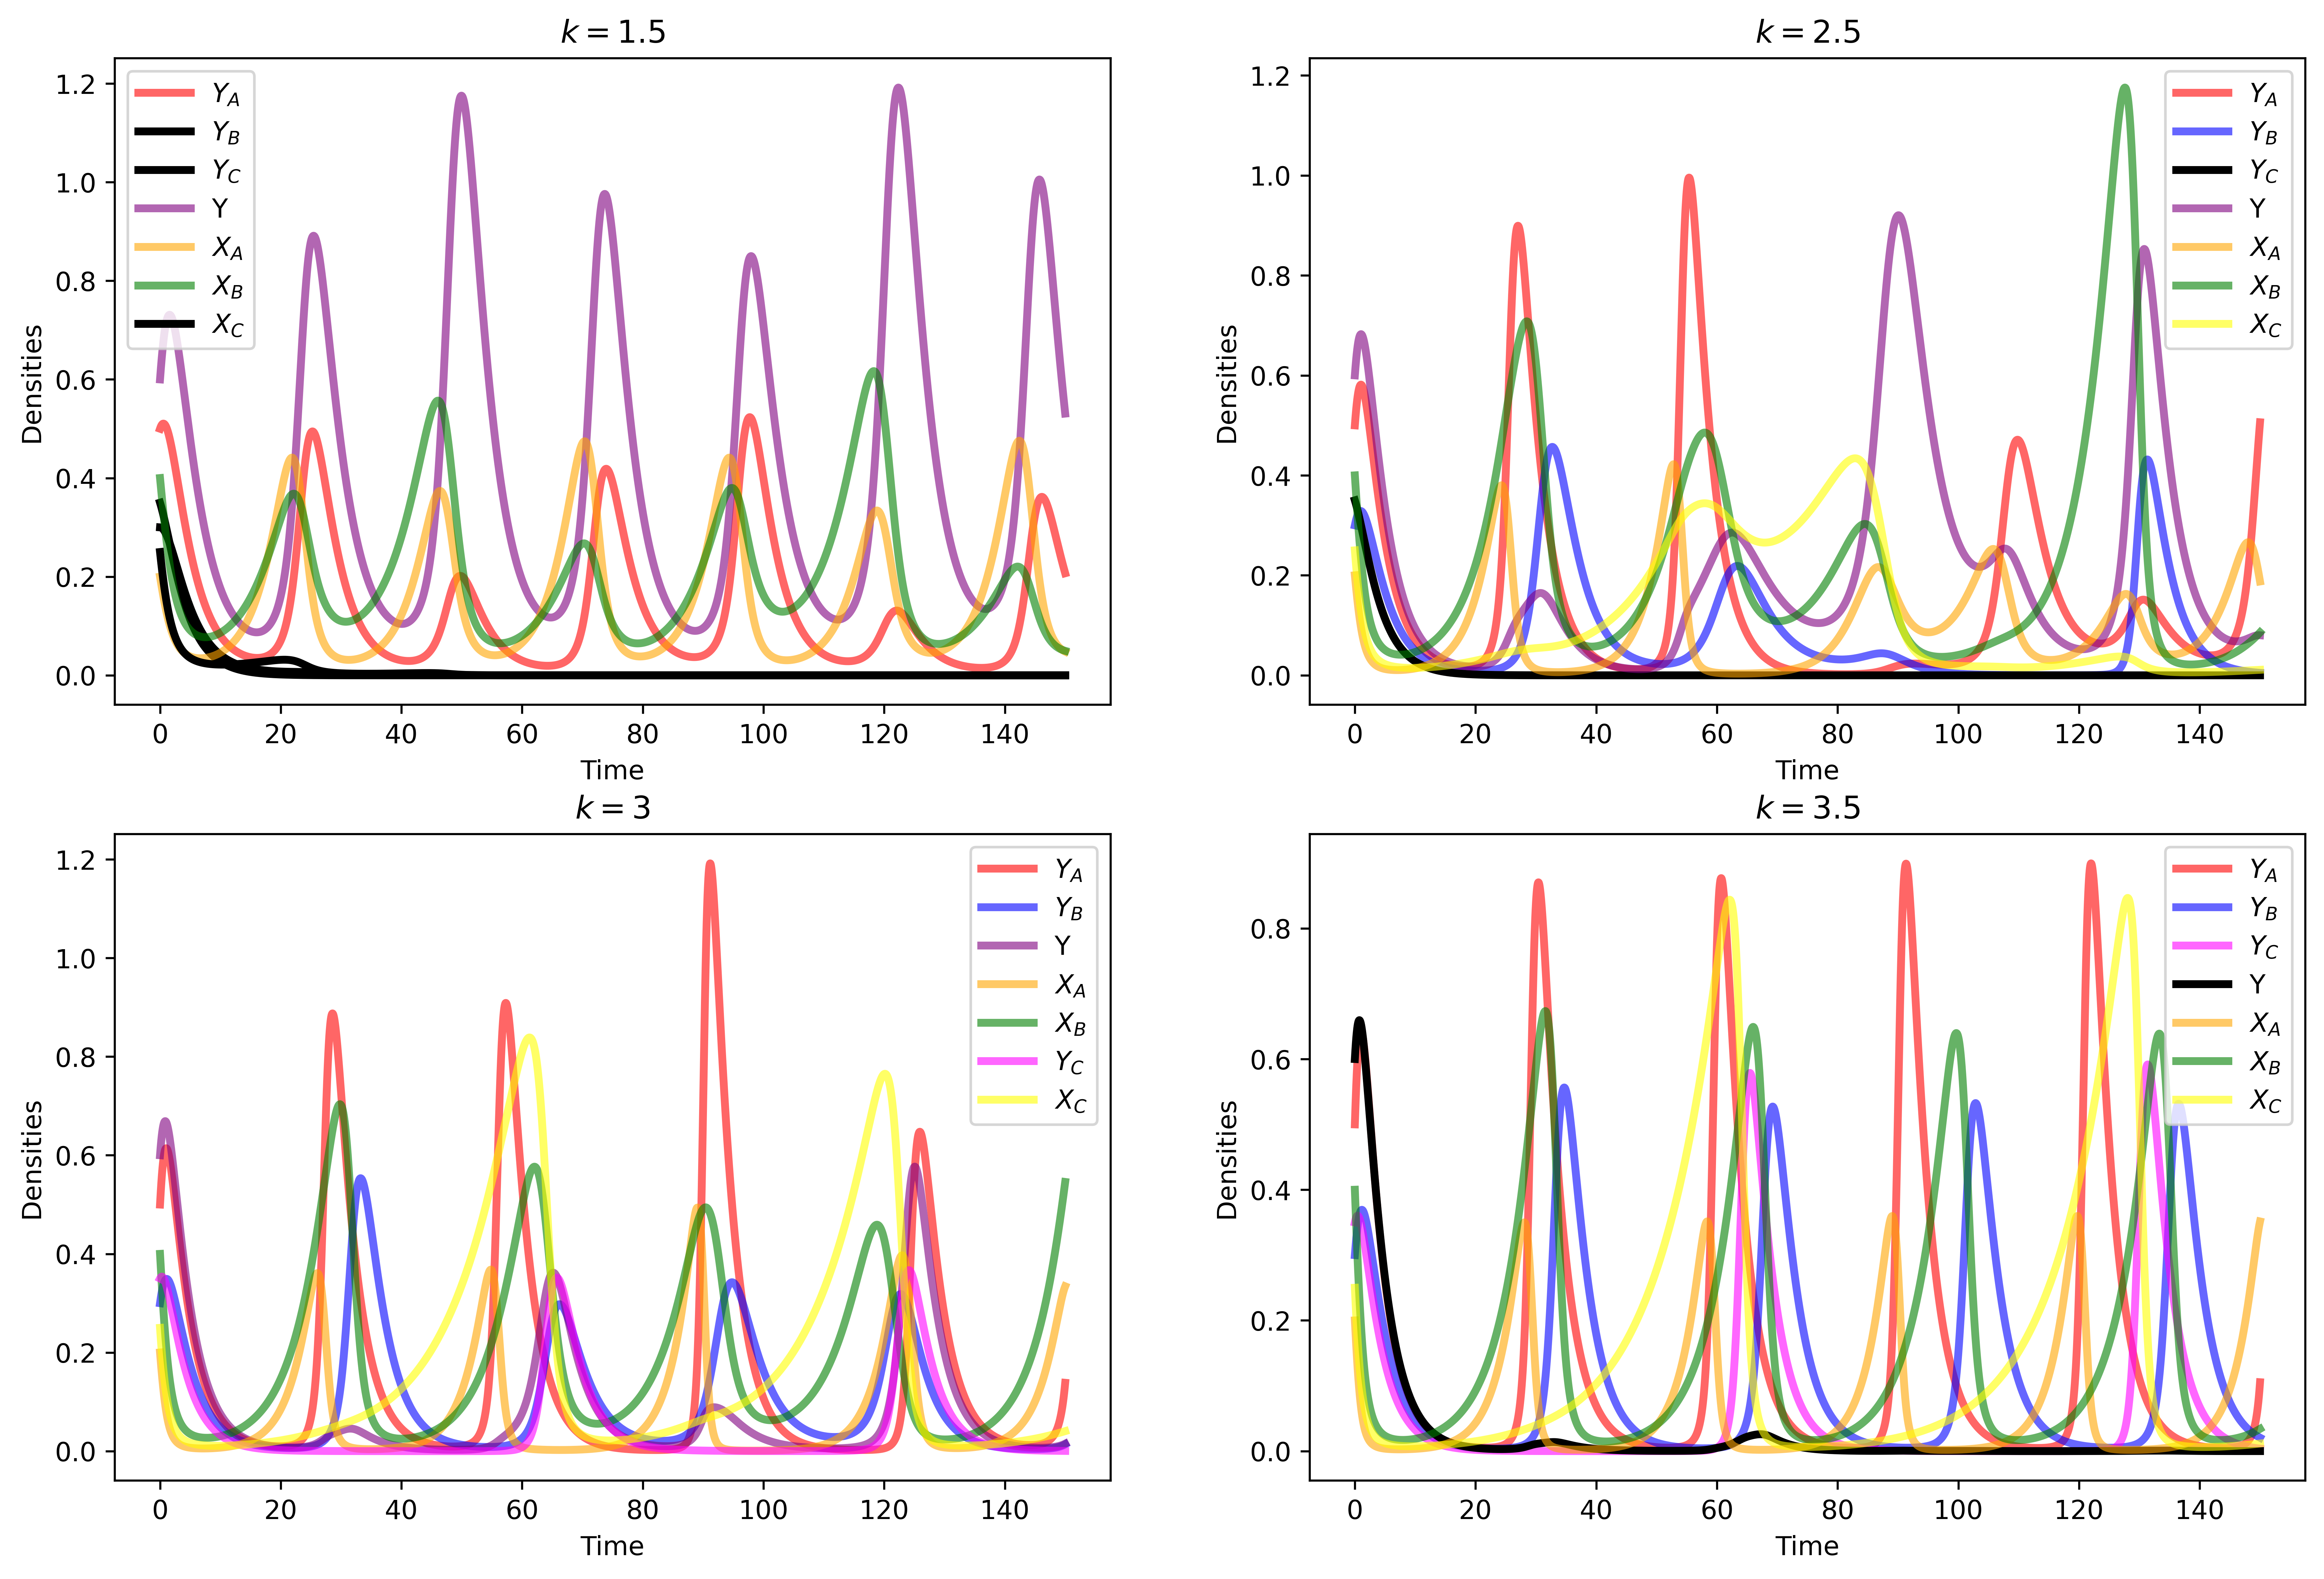

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10), dpi=600)
lwd=3
maxtime=150
trcy = 0.6
q=0.5
p=1.5

k = 1.5

sol,solT = DetGameSPE3(y03,al,w,mu,de,k,n,p,q,maxtime)

Ya,Yb,Yc,Y,Xa,Xb,Xc = sol.T

axs[0,0].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Yb, label="$Y_B$", c='black', linewidth=lwd, alpha=1)
axs[0,0].plot(solT,Yc, label="$Y_C$", c='black', linewidth=lwd, alpha=1)
axs[0,0].plot(solT,Y, label="Y", c='purple', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[0,0].plot(solT,Xc, label="$X_C$", c='black', linewidth=lwd, alpha=1)
axs[0,0].legend(loc='best')
axs[0,0].set_title('$k=1.5$')
axs[0,0].set_ylabel('Densities')
axs[0,0].set_xlabel('Time')



k = 2.5


sol,solT = DetGameSPE3(y03,al,w,mu,de,k,n,p,q,maxtime)

Ya,Yb,Tc,Y,Xa,Xb,Xc = sol.T

axs[0,1].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Yc, label="$Y_C$", c='black', linewidth=lwd, alpha=1)
axs[0,1].plot(solT,Y, label="Y", c='purple', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[0,1].plot(solT,Xc, label="$X_C$", c='yellow', linewidth=lwd, alpha=trcy)
axs[0,1].legend(loc='best')
axs[0,1].set_title('$k=2.5$')
axs[0,1].set_ylabel('Densities')
axs[0,1].set_xlabel('Time')



k = 3

sol,solT = DetGameSPE3(y03,al,w,mu,de,k,n,p,q,maxtime)

Ya,Yb,Yc,Y,Xa,Xb,Xc = sol.T

axs[1,0].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Y, label="Y", c='purple', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Yc, label="$Y_C$", c='magenta', linewidth=lwd, alpha=trcy)
axs[1,0].plot(solT,Xc, label="$X_C$", c='yellow', linewidth=lwd, alpha=trcy)
axs[1,0].legend(loc='best')
axs[1,0].set_title('$k=3$')
axs[1,0].set_ylabel('Densities')
axs[1,0].set_xlabel('Time')



k = 3.5

sol,solT = DetGameSPE3(y03,al,w,mu,de,k,n,p,q,maxtime)

Ya,Yb,Yc,Y,Xa,Xb,Xc = sol.T

axs[1,1].plot(solT,Ya, label="$Y_A$", c='red', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Yb, label="$Y_B$", c='blue', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Yc, label="$Y_C$", c='magenta', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Y, label="Y", c='black', linewidth=lwd, alpha=1)
axs[1,1].plot(solT,Xa, label="$X_A$", c='orange', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Xb, label="$X_B$", c='green', linewidth=lwd, alpha=trcy)
axs[1,1].plot(solT,Xc, label="$X_C$", c='yellow', linewidth=lwd, alpha=trcy)
axs[1,1].legend(loc='best')
axs[1,1].set_title('$k=3.5$')
axs[1,1].set_ylabel('Densities')
axs[1,1].set_xlabel('Time')

plt.savefig('graphic2',dpi=300,format='png')